# ML Regressin for California Housing Prices

## Import dependency

In [1]:
import pandas as pd
import numpy as np

## Data preparation

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.columns.str.lower().str.replace(' ', '_')

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['ocean_proximity']

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [8]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## EDA

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5



In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

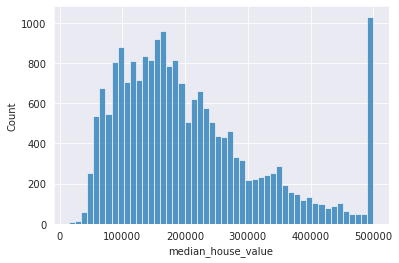

In [12]:
sns.histplot(df.median_house_value, bins=50)

In [13]:
# For the rest of the homework, you'll need to use only these columns
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']
target = ['median_house_value_log']
df['median_house_value_log'] = np.log1p(df.median_house_value)

## Question 1
### Find a features with missing values.
### How many missing values does it have?

In [14]:
na_per_feature = df[features].isna().sum()
print(na_per_feature[na_per_feature > 0])  # total_bedrooms has 207 na values

total_bedrooms    207
dtype: int64


## Question 2
### What's the median (50% percentile) for the population variable?

In [ ]:
population_median = np.median(df.population)
print(population_median)  # 1'166

## Prepare the validation framework
The following code chunk contains data necessary to do the train-test split, train the linear regression model, shuffle the dataframe, compute the root-mean-square error and perform prediction using the model.

In [16]:
# %% Split the data
# This code chunk contains the necessary functions to shuffle the dataframe,
# train the linear regression model & do the train-test split.

def shuffle(data, random_seed):
    """ Returns a shuffled version of the original dataframe
    :param pd.DataFrame data: a dataframe
    :param float random_seed: a seed that controls reproducibility
    :return: Shuffled data
    :rtype: pd.DataFrame
    """
    n = len(data)
    np.random.seed(random_seed)
    index = np.arange(n)
    np.random.shuffle(index)

    shuffled_data = data.iloc[index].reset_index(drop=True)
    return shuffled_data


def split(data, validation_percent=0.2, test_percent=0.2):
    """
    :param pd.DataFrame data: a dataframe
    :param float validation_percent: validation set percentage
    :param float test_percent: test set percentage
    :return: the train, validation and test set
    :rtype: tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]
    """
    n = len(data)
    n_val = int(n * validation_percent)
    n_test = int(n * test_percent)
    n_train = n - n_val - n_test

    df_train = data.iloc[:n_train]
    df_val = data.iloc[n_train:n_train + n_val]
    df_test = data.iloc[n_train + n_val:]

    return df_train, df_val, df_test


def prepare_validation_framework(data, random_seed=42):
    """ Prepares the validation framework for a machine learning model
    :param pd.DataFrame data: a dataframe
    :param float random_seed: a seed that controls reproducibility
    :return: the train, validation and test set, separated by features (X) and target (y)
    :rtype: tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]
    """
    data = shuffle(data.copy(), random_seed)

    n = len(data)
    n_val = int(n * 0.2)  # Validation size
    n_test = int(n * 0.2)  # Test size
    n_train = n - n_val - n_test  # Train size

    # Performing the train-test split
    df_train = data.iloc[:n_train][features]
    df_val = data.iloc[n_train:n_train + n_val][features]
    df_test = data.iloc[n_train + n_val:][features]

    target_train = data.iloc[:n_train][target].squeeze()
    target_val = data.iloc[n_train:n_train + n_val][target].squeeze()
    target_test = data.iloc[n_train + n_val:][target].squeeze()

    return df_train, df_val, df_test, target_train, target_val, target_test


def train_linear_regression_reg(X, y, r=0.0):
    """ Estimates the parameters of a regularized linear regression model
    :param np.ndarray X: a matrix
    :param np.ndarray y: a vector
    :param np.ndarray r: the Lagrange multiplier
    :return: the beta coefficients of the model
    :rtype: np.ndarray
    """
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    # Regularization
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full


def train_linear_regression(X, y):
    """ Estimates the parameters of a linear regression model
    :param X: a matrix
    :param y: a vector
    :return: the beta coefficients of the model
    :rtype: np.ndarray
    """
    ones = np.ones(len(X))
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    betas = XTX_inv.dot(X.T).dot(y)

    return betas


def predict(X, betas):
    """ Predicts values using a linear regression model
    :param np.ndarray X: Design matrix
    :param np.ndarray betas: Beta coefficients
    :return: Estimated target values
    :rtype: np.ndarray
    """
    return betas[0] + X.dot(betas[1:])


def rmse(y, y_hat):
    """ Computes the Root Mean Square Error
    :param y: vector
    :param y_hat: estimated vector
    :return: the root-mean-square error
    :rtype: np.ndarray
    """
    squared_errors = (y - y_hat) ** 2
    mean_squared_error = np.mean(squared_errors)
    return np.sqrt(mean_squared_error)

## Q3 - We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

### Approach 1 : Fill with 0

In [17]:
x_train, x_val, x_test, y_train, y_val, y_test = prepare_validation_framework(df, random_seed=42)

zero_linear_model = train_linear_regression(x_train.fillna(0).values, y_train.values)
zero_predicted_y_val = predict(x_val, zero_linear_model)
zero_rmse = rmse(y_val.values, zero_predicted_y_val)
print(zero_rmse)

0.3295330365228009


### Approach 2: Filling with NAs

In [18]:
total_bedrooms_mean = x_train.total_bedrooms.mean()
mean_linear_model = train_linear_regression(x_train.fillna(total_bedrooms_mean).values, y_train.values)
mean_predicted_y_val = predict(x_val, mean_linear_model)
mean_rmse = rmse(y_val.values, mean_predicted_y_val)
print(mean_rmse)

0.3290195439006004


* the answer are equally good

##  For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

In [19]:
multipliers = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_per_multiplier = dict()
for multiplier in multipliers:
    model = train_linear_regression_reg(x_train.fillna(0).values, y_train.values, r=multiplier)
    model_prediction_val = predict(x_val, model)
    model_rmse = rmse(y_val.values, model_prediction_val)
    rmse_per_multiplier[multiplier] = model_rmse
print(rmse_per_multiplier)

{0: 0.3295330365228009, 1e-06: 0.329533036164838, 0.0001: 0.32953300097042926, 0.001: 0.32953270386695305, 0.01: 0.32953193659926727, 0.1: 0.32969472053972865, 1: 0.3337887220004452, 5: 0.3392485345505934, 10: 0.3406063807809623}


* There is almost no difference between the different multipliers. I select the smallest.

### Q5 - We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [20]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_per_seed = dict()
for seed in seeds:
    x_train, x_val, x_test, y_train, y_val, y_test = prepare_validation_framework(df, random_seed=seed)
    model = train_linear_regression(x_train.fillna(0).values, y_train.values)
    model_prediction_val = predict(x_val, model)
    model_rmse = rmse(y_val.values, model_prediction_val)
    rmse_per_seed[seed] = model_rmse
deviation = np.std([value for value in rmse_per_seed.values()])
print(round(deviation, 3))

0.004


In [ ]:
## Question 6
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [21]:
x_train, x_val, x_test, y_train, y_val, y_test = prepare_validation_framework(df, random_seed=9)
full_x_train_set = pd.concat([x_train, x_val]).fillna(0)
full_y_train_set = pd.concat([y_train, y_val]).fillna(0)

reg_model = train_linear_regression_reg(full_x_train_set.values, full_y_train_set.values, r=0.001)
reg_model_test_pred = predict(x_test, reg_model)
reg_model_rmse = rmse(y_test, reg_model_test_pred)
print(reg_model_rmse)

0.34516008528830955
